### Урок 7 Линейная регрессия. Однофакторный дисперсионный анализ#

### -- Автор: Шенк Евгений Станиславович

In [1]:
import warnings

import math
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from copy import deepcopy

warnings.filterwarnings('ignore')

### Задание 1.

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

In [3]:
b1 = np.cov(salary, scoring, ddof=1)[0, 1] / np.var(salary, ddof=1)
b0 = scoring.mean() - b1 * salary.mean()
b1, b0

(2.620538882402765, 444.1773573243596)

модель линейной регрессии:
$$y = 444.18 + 2.62 \cdot x,$$

In [4]:
salary_2 = deepcopy(salary)
ones = np.ones((salary_2.shape[0], 1))
salary_2 = np.hstack((ones, salary_2.reshape(len(salary_2),1)))
salary_2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [5]:
XTX = salary_2.T.dot(salary_2)

np.linalg.det(XTX)

349464.00000000023

In [6]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(salary_2.T).dot(scoring)

print(b)

[444.17735732   2.62053888]


модель линейной регрессии:
$$y = 444.18 + 2.62 \cdot x,$$

2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

Text(0, 0.5, 'Значения поведенческого кредитного скоринга')

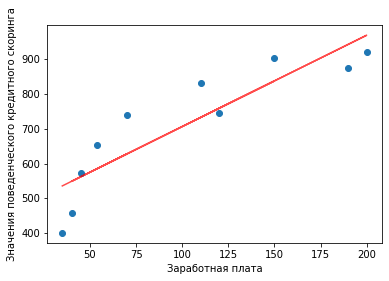

In [7]:
x = salary
y = b0 + b1 * x

plt.scatter(salary, scoring)
plt.plot(x, y, color='red', alpha=0.7)

plt.xlabel('Заработная плата')
plt.ylabel('Значения поведенческого кредитного скоринга')

3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

In [8]:
# Коэффициент детерминации:
z = b0 + b1 * salary
R = 1 - (z - scoring).var() / scoring.var()
R

0.7876386635293686

In [9]:
np.corrcoef(salary, scoring) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

In [10]:
def mean_approximation_error(real: np.ndarray, pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((real - pred) / real).mean()

In [11]:
mean_approximation_error(scoring, z)

0.11469251843561709

4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
$$F = \dfrac{R^2 / k}{(1 - R^2) / (n - k - 1)},$$

In [12]:
k1 = 1
k2 = len(salary) - k1 - 1

F1 = (R / k1) / ((1 - R) / k2)
F1

29.67164085966451

In [13]:
alpha = 0.01

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

11.258624143272643

$F > F_{crit}$ - уравнение регрессии статистически значимо.

5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.
$$P \left( \hat{b}_1 - t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \leq b_1 \leq \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right) = p$$
$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$$

In [14]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [15]:
s_slope = standard_error_slope(salary, scoring, z)
s_slope

0.48108279568516005

In [16]:
alpha = 0.05
n = len(salary - 2)

t = stats.t.ppf(1 - alpha / 2, df=n)
t

2.2281388519649385

In [17]:
# Доверительный интервал для b1
(b1 - t * s_slope, b1 + t * s_slope)

(1.5486196143247493, 3.6924581504807805)

In [18]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [19]:
s_intercept = standard_error_intercept(salary, scoring, z)
s_intercept

56.46649755068153

In [20]:
# Доверительный интервал для b0
(b0 - t * s_intercept, b0 + t * s_intercept)

(318.36216029730303, 569.9925543514162)

### Задание 2.

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

In [21]:
y1 = scoring[:5]  # в Москве
y2 = scoring[5:]  # в Санкт-Петербурге

n1 = y1.shape[0]
n2 = y2.shape[0]

y1_mean = y1.mean()
y2_mean = y2.mean()

y1_mean, y2_mean

(645.4, 774.4)

In [22]:
y_mean = scoring.mean()

y_mean

709.9

Найдём значения $S_b^2$ и $S_w^2$:

In [23]:
S2_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2

S2_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

S2_b, S2_w

(41602.5, 263086.39999999997)

In [24]:
k = 2
n = scoring.shape[0]

k1 = k - 1
k2 = n - k

sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

sigma2_b, sigma2_w

(41602.5, 32885.799999999996)

In [25]:
F = sigma2_b / sigma2_w
F

1.2650596914169643

In [26]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Видим, что $F < F_{crit}$, поэтому заключаем, что этот фактор НЕ является статистически значимым.

### Задание 3.

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{

    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,

коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [27]:
ans_x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
ans_y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
ans_x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
ans_y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
ans_x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
ans_y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
ans_x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
ans_y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

In [28]:
mean_x1 = ans_x1.mean()
mean_y1 = ans_y1.mean()
mean_x2 = ans_x2.mean()
mean_y2 = ans_y2.mean()
mean_x3 = ans_x3.mean()
mean_y3 = ans_y3.mean()
mean_x4 = ans_x4.mean()
mean_y4 = ans_y4.mean()

mean_x1, mean_y1 ,mean_x2, mean_y2, mean_x3, mean_y3, mean_x4, mean_y4

(9.0,
 7.500909090909093,
 9.0,
 7.50090909090909,
 9.0,
 7.5,
 9.0,
 7.500909090909091)

In [29]:
var_x1 = ans_x1.var()
var_y1 = ans_y1.var()
var_x2 = ans_x2.var()
var_y2 = ans_y2.var()
var_x3 = ans_x3.var()
var_y3 = ans_y3.var()
var_x4 = ans_x4.var()
var_y4 = ans_y4.var()

var_x1, var_y1 ,var_x2, var_y2, var_x3, var_y3, var_x4, var_y4

(10.0,
 3.7520628099173554,
 10.0,
 3.752390082644628,
 10.0,
 3.747836363636364,
 10.0,
 3.7484082644628103)

In [30]:
np.corrcoef(ans_x1, ans_y1)

array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [31]:
np.corrcoef(ans_x2, ans_y2)

array([[1.        , 0.81623651],
       [0.81623651, 1.        ]])

In [32]:
np.corrcoef(ans_x3, ans_y3)

array([[1.        , 0.81628674],
       [0.81628674, 1.        ]])

In [33]:
np.corrcoef(ans_x4, ans_y4)

array([[1.        , 0.81652144],
       [0.81652144, 1.        ]])

In [34]:
b1_1 = np.cov(ans_x1, ans_y1, ddof=1)[0, 1] / np.var(ans_x1, ddof=1)
b0_1 = ans_y1.mean() - b1_1 * ans_x1.mean()
b1_1, b0_1

(0.5000909090909093, 3.0000909090909094)

In [35]:
b1_2 = np.cov(ans_x2, ans_y2, ddof=1)[0, 1] / np.var(ans_x2, ddof=1)
b0_2 = ans_y2.mean() - b1_2 * ans_x2.mean()
b1_2, b0_2

(0.5000000000000001, 3.000909090909089)

In [36]:
b1_3 = np.cov(ans_x3, ans_y3, ddof=1)[0, 1] / np.var(ans_x3, ddof=1)
b0_3 = ans_y1.mean() - b1_3 * ans_x3.mean()
b1_3, b0_3

(0.49972727272727285, 3.0033636363636367)

In [37]:
b1_4 = np.cov(ans_x4, ans_y4, ddof=1)[0, 1] / np.var(ans_x4, ddof=1)
b0_4 = ans_y1.mean() - b1_4 * ans_x4.mean()
b1_4, b0_4

(0.49990909090909086, 3.0017272727272752)

(2, 14)

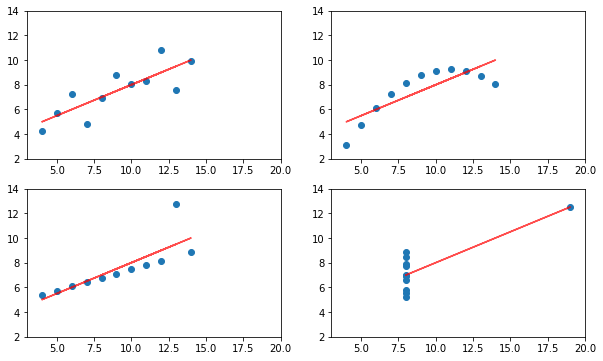

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ax1, ax2, ax3, ax4 = axes.flatten()

line_1 = b0_1 + b1_1 * ans_x1
line_2 = b0_2 + b1_2 * ans_x2
line_3 = b0_3 + b1_3 * ans_x3
line_4 = b0_4 + b1_4 * ans_x4
    
ax1.scatter(ans_x1, ans_y1)
ax1.plot(ans_x1, line_1, color='red', alpha=0.7)
ax1.set_xlim(3, 20)
ax1.set_ylim(2, 14)

ax2.scatter(ans_x2, ans_y2)
ax2.plot(ans_x2, line_2, color='red', alpha=0.7)
ax2.set_xlim(3, 20)
ax2.set_ylim(2, 14)

ax3.scatter(ans_x3, ans_y3)
ax3.plot(ans_x3, line_3, color='red', alpha=0.7)
ax3.set_xlim(3, 20)
ax3.set_ylim(2, 14)

ax4.scatter(ans_x4, ans_y4)
ax4.plot(ans_x4, line_4, color='red', alpha=0.7)
ax4.set_xlim(3, 20)
ax4.set_ylim(2, 14)
    